<a href="https://colab.research.google.com/github/Anishoond/Prediccion-del-tiempo-de-permanencia-de-pacientes-en-un-hospital/blob/main/03_Modelos_e_iteraciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EXPLORACIÓN DE DATOS**

**Importación de librerias**

In [85]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_validate, ShuffleSplit




from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score, mean_squared_error,mean_squared_log_error


from sklearn.model_selection import ShuffleSplit, KFold,cross_val_score

**Obtención del Dataset**

In [86]:
# Obtencion de los archivos en formato Zip desde repositorio Github
!wget https://github.com/anishoond/Archivos_Proyecto/blob/main/Archivos_proyecto.zip?raw=true



--2023-05-28 02:29:20--  https://github.com/anishoond/Archivos_Proyecto/blob/main/Archivos_proyecto.zip?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/anishoond/Archivos_Proyecto/raw/main/Archivos_proyecto.zip [following]
--2023-05-28 02:29:21--  https://github.com/anishoond/Archivos_Proyecto/raw/main/Archivos_proyecto.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/anishoond/Archivos_Proyecto/main/Archivos_proyecto.zip [following]
--2023-05-28 02:29:21--  https://raw.githubusercontent.com/anishoond/Archivos_Proyecto/main/Archivos_proyecto.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|

In [87]:
 # Se descomprimen los archivos
!unzip /content/Archivos_proyecto.zip?raw=true

Archive:  /content/Archivos_proyecto.zip?raw=true
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: sample_submission.csv   
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               
replace train_data_dict.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train_data_dict.csv     
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                


**Carga de los archivos a la base local de colab**

In [88]:
#Se carga la base de datos
data_org = pd.read_csv("train.csv",index_col=0)
DT_in2 = pd.read_csv("train.csv",index_col=0)
data_test = pd.read_csv("test.csv",index_col=0) #Dataset adicional para prueba
data_org.head(15)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10
8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50
9,1,d,10,Y,2,gynecology,R,B,4.0,31397,7.0,Trauma,Extreme,2,51-60,7223.0,51-60


In [89]:
# Variables
data_org.columns

# Tamaño del dataset
print(data_org.shape)

(318438, 17)


In [90]:
# Tipo de datos en el dataset
for c in data_org.columns:
    print ("%20s"%c, data_org[c].dtype)

       Hospital_code int64
  Hospital_type_code object
  City_Code_Hospital int64
Hospital_region_code object
Available Extra Rooms in Hospital int64
          Department object
           Ward_Type object
  Ward_Facility_Code object
           Bed Grade float64
           patientid int64
   City_Code_Patient float64
   Type of Admission object
 Severity of Illness object
Visitors with Patient int64
                 Age object
   Admission_Deposit float64
                Stay object


In [91]:
#Variables categóricas
ccols = [i for i in data_org.columns if not i in data_org._get_numeric_data()]
for c in ccols:
    print ("%10s"%c, np.unique(data_org[c].dropna()))

Hospital_type_code ['a' 'b' 'c' 'd' 'e' 'f' 'g']
Hospital_region_code ['X' 'Y' 'Z']
Department ['TB & Chest disease' 'anesthesia' 'gynecology' 'radiotherapy' 'surgery']
 Ward_Type ['P' 'Q' 'R' 'S' 'T' 'U']
Ward_Facility_Code ['A' 'B' 'C' 'D' 'E' 'F']
Type of Admission ['Emergency' 'Trauma' 'Urgent']
Severity of Illness ['Extreme' 'Minor' 'Moderate']
       Age ['0-10' '11-20' '21-30' '31-40' '41-50' '51-60' '61-70' '71-80' '81-90'
 '91-100']
      Stay ['0-10' '11-20' '21-30' '31-40' '41-50' '51-60' '61-70' '71-80' '81-90'
 '91-100' 'More than 100 Days']


In [92]:
# Datos nulos presentes en el dataset de entrenamiento
k = data_org.isna().sum()
k[k!=0]

Bed Grade             113
City_Code_Patient    4532
dtype: int64

In [93]:

#Visualiación de columnas numericas
data_org.select_dtypes(np.number).head()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
case_id,,,,,,,,
1,8,3,3,2.0,31397,7.0,2,4911.0
2,2,5,2,2.0,31397,7.0,2,5954.0
3,10,1,2,2.0,31397,7.0,2,4745.0
4,26,2,2,2.0,31397,7.0,2,7272.0
5,26,2,2,2.0,31397,7.0,2,5558.0


In [94]:
DT_in = data_org[:]

DT_in2 = DT_in[:] # COPIA DEL DATA SET ORIGINAL: se hace esta copia pues en este data frame se guardarán 
                  # los datos modificados

C_STR_names = [] # lista que contiene los nombres de las columnas que incluyen variables tipo objeto
C_STR_values = [] # lista que contiene las varibles categoricas pertenecientes a cada columna

for i in DT_in.columns:
    if DT_in[i].dtype == 'object':
     C_STR_names.append(i) 
     C_STR_values.append(np.unique(DT_in[i]))

print(C_STR_names)
print('\n')
print(C_STR_values)

['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay']


[array(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype=object), array(['X', 'Y', 'Z'], dtype=object), array(['TB & Chest disease', 'anesthesia', 'gynecology', 'radiotherapy',
       'surgery'], dtype=object), array(['P', 'Q', 'R', 'S', 'T', 'U'], dtype=object), array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object), array(['Emergency', 'Trauma', 'Urgent'], dtype=object), array(['Extreme', 'Minor', 'Moderate'], dtype=object), array(['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70',
       '71-80', '81-90', '91-100'], dtype=object), array(['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70',
       '71-80', '81-90', '91-100', 'More than 100 Days'], dtype=object)]


In [95]:
#FUNCION QUE TIENE COMO OBJETIVO ASIGNAR UN VALOR NUMERICO A CADA VARIBLE CATEGORICA
#POR AHORA ESTÁ PROGRAMADO PARA ASIGNAR UNOS Y CEROS

def hinzu_columns(name_c, values_c,DF_org):
    
    """name_c = nombre de la columna que contiene los nombres
        de las columnas a agregar
    
      values_c= nombres de las columnas a agregar
     
      DF_org =  el data frame en donde se encuentran la columna 
      con nombre name_c y a la cual pertenecen los valores contenidos
      en la lista values_c
      
      indx_obj = será una lista de listas en donde cada elemento 
      corresponderá a un array lleno se unos y ceros. así se cambiará de una
      etiqueta string a una númerica
    
    """
    # for name_c in C_STR_names[contador_names:contador_names+1]:
        
    indx_obj = np.array([(DF_org[name_c] == val_c)*1 for val_c in values_c ])
    
    
    return indx_obj


#SE EMPLEA LA FUNCIÓN ANTERIOR PARA CONVERTIR LAS VARIABLES CATEGORICAS EN COLUMNAS 
# Y RELLENAR LOS DATOS DE CADA FILA CON UN 0 U 1 

for n in range(7):
    
    new_columns = np.transpose(hinzu_columns(C_STR_names[n],C_STR_values[n],DT_in))
    
    
    DT_in2[C_STR_values[n]] = new_columns
  

#SE PUEDE OBSERVAR COMO LAS VARIABLES CONTENIDAS EN LAS COLUMNAS DEL DARA SET ORIGINAL
#AHORA SON COLUMNAS, ASÍ MISMO YA NO SE TIENEN VALRIABLES CATEGORICAS, SOLO NUMERICAS

DT_in2.drop(C_STR_names[:7], axis = 'columns', inplace=True)
DT_in2

<ipython-input-95-560e243b791e>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DT_in2[C_STR_values[n]] = new_columns
<ipython-input-95-560e243b791e>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DT_in2[C_STR_values[n]] = new_columns
<ipython-input-95-560e243b791e>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Age,Admission_Deposit,Stay,...,C,D,E,F,Emergency,Trauma,Urgent,Extreme,Minor,Moderate
case_id,,,,,,,,,,,,,,,,,,,,,
1,8,3,3,2.0,31397,7.0,2,51-60,4911.0,0-10,...,0,0,0,1,1,0,0,1,0,0
2,2,5,2,2.0,31397,7.0,2,51-60,5954.0,41-50,...,0,0,0,1,0,1,0,1,0,0
3,10,1,2,2.0,31397,7.0,2,51-60,4745.0,31-40,...,0,0,1,0,0,1,0,1,0,0
4,26,2,2,2.0,31397,7.0,2,51-60,7272.0,41-50,...,0,1,0,0,0,1,0,1,0,0
5,26,2,2,2.0,31397,7.0,2,51-60,5558.0,41-50,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318434,6,6,3,4.0,86499,23.0,3,41-50,4144.0,11-20,...,0,0,0,1,1,0,0,0,0,1
318435,24,1,2,4.0,325,8.0,4,81-90,6699.0,31-40,...,0,0,1,0,0,0,1,0,0,1
318436,7,4,3,4.0,125235,10.0,3,71-80,4235.0,11-20,...,0,0,0,1,1,0,0,0,1,0


In [96]:
#A PESAR DE QUE ALGUNAS VARIABLES CONTENIDAS EN COLUMNAS SON IDENTIFICADAS COMO CATEGORICAS
#ESTAS CORRESPONDEN A UN RANGO, COMO EN LA COLUMA DE 'Age' y 'Stay'
#POR LO CUAL SE DECIDEN CREAR COLUMNAS EN LAS QUE SE CONTANTAN 
#EL VALOR MINIMO Y MAXIMO DEL RANGO


def rangos_edades (rango_str, DTf_ages, col_name_org, new_col_min, new_col_max):
    """rango_str =  es un string con dos valores, un minimo y un maximo
    
    DTf_ages, es un data frame en donde se agregaran los valores minimos
    y maximos extraidos de rango_str a la columna correspondiente
    
    como resultado de la función se tendrá que en el data frame entregado 
    se escribirán los valores minimos y maximos en las columnas especificadas

    """
    
    guion = rango_str.index('-')
    
    min_rango = int(rango_str[0:guion])
    
    max_rango = int(rango_str[guion+1:])
    
    
    DTf_ages.loc[DTf_ages[col_name_org] == rango_str, new_col_min] = min_rango
    
    DTf_ages.loc[DTf_ages[col_name_org] == rango_str, new_col_max] = max_rango
    
    return min_rango, max_rango


for age in C_STR_values[7]:
    
   rangos_edades(age,DT_in2,'Age','edad_min','edad_max')

DT_in2.drop(C_STR_names[7], axis = 'columns', inplace=True)


More_than_100_Days = DT_in2['Stay']=='More than 100 Days'
indices_More_than_100_Days = More_than_100_Days.loc[More_than_100_Days == True].index

DT_in2.loc[indices_More_than_100_Days , 'Stay'] = '101-110'


C_STR_values[8][-1] = '101-110'

for days in C_STR_values[8]:
    
    rangos_edades(days,DT_in2,'Stay','min_days','max_days')


DT_in2.drop('Stay', axis = 'columns', inplace=True)

#SE OBSERVA QUE SE HAN CAMBIADO LAS COLUMNAS STAY Y AGE POR DOS NUEVAS COLUMNAS
#QUE CONTIENEN LOS VALORES DE LOS RANGOS
DT_in2


<ipython-input-96-5c244aaa1ddb>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DTf_ages.loc[DTf_ages[col_name_org] == rango_str, new_col_min] = min_rango
<ipython-input-96-5c244aaa1ddb>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DTf_ages.loc[DTf_ages[col_name_org] == rango_str, new_col_max] = max_rango
<ipython-input-96-5c244aaa1ddb>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit,a,b,...,Emergency,Trauma,Urgent,Extreme,Minor,Moderate,edad_min,edad_max,min_days,max_days
case_id,,,,,,,,,,,,,,,,,,,,,
1,8,3,3,2.0,31397,7.0,2,4911.0,0,0,...,1,0,0,1,0,0,51.0,60.0,0.0,10.0
2,2,5,2,2.0,31397,7.0,2,5954.0,0,0,...,0,1,0,1,0,0,51.0,60.0,41.0,50.0
3,10,1,2,2.0,31397,7.0,2,4745.0,0,0,...,0,1,0,1,0,0,51.0,60.0,31.0,40.0
4,26,2,2,2.0,31397,7.0,2,7272.0,0,1,...,0,1,0,1,0,0,51.0,60.0,41.0,50.0
5,26,2,2,2.0,31397,7.0,2,5558.0,0,1,...,0,1,0,1,0,0,51.0,60.0,41.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318434,6,6,3,4.0,86499,23.0,3,4144.0,1,0,...,1,0,0,0,0,1,41.0,50.0,11.0,20.0
318435,24,1,2,4.0,325,8.0,4,6699.0,1,0,...,0,0,1,0,0,1,81.0,90.0,31.0,40.0
318436,7,4,3,4.0,125235,10.0,3,4235.0,1,0,...,1,0,0,0,1,0,71.0,80.0,11.0,20.0


In [97]:
#LOS DATOS NA ESTAN ASOCIADOS CON COLUMNAS QUE CONTIENEN VALORES NUMERICOS ACOTADOS
#ES DECIR, SE ENCUENTRAN EN UN RANGO, POR LO CUAL LA ESTRATEGIA DE LLENADO DE DATOS 
#ES REEMPLAZAR EL VALOR NA POR UN VALOR DENTRO DE UN RANGO LOGICO
import random as rnd
def random_fill_nan(col_name_nan, DTf_rep_nan):
    
    """col_name_nan es el nombre de la columna en donde se tienen valores 
    NaN
    
    DTf_rep_nan es el data frame que contiene la columna con nombre col_name_nan
    y en donde se van a reemplzar los valores por NaN por otro valor.
    
    Los datos NaN se reemplzan por un valor aleatorio contenido en los valores
    existentes en las columnas.
    
    La función retorna un El data set ingresado sin datos NaN
    """
    
    
    val_na_col = DTf_rep_nan[col_name_nan].isna()
    
    indices_nan= val_na_col.loc[val_na_col == True].index
    
    values_in_nan_cols = np.unique(DTf_rep_nan[col_name_nan])

    min_val_replace = min(values_in_nan_cols)
    
    max_val_replace = max(values_in_nan_cols)
    
    for indx_nan_r in indices_nan:
       
        new_nan1 = float(rnd.randint(min_val_replace,max_val_replace))
        
        DTf_rep_nan.loc[indx_nan_r , col_name_nan] = new_nan1
    
    return 'done'


col_names_nan = []
for na_obj in DT_in2.columns:
    
    if np.sum(DT_in2[na_obj].isna()) !=0:
        col_names_nan.append(na_obj)
 



for c_nan_name in col_names_nan:
    
    random_fill_nan(c_nan_name,DT_in2)

#SE OBSEERVAN LAS NUEVAS COLUMNAS DEL DATA SET DE TRAIN
#SE OBSERVA TAMBIÉN QUE NO SE TIENEN DATOS NULOS NI TIPO OBJECT

for na_obj in DT_in2.columns:
    
    
     print ("%20s"%na_obj, np.sum(DT_in2[na_obj].isna()),'  type', DT_in2[na_obj].dtype)
     
print('\n')


       Hospital_code 0   type int64
  City_Code_Hospital 0   type int64
Available Extra Rooms in Hospital 0   type int64
           Bed Grade 0   type float64
           patientid 0   type int64
   City_Code_Patient 0   type float64
Visitors with Patient 0   type int64
   Admission_Deposit 0   type float64
                   a 0   type int64
                   b 0   type int64
                   c 0   type int64
                   d 0   type int64
                   e 0   type int64
                   f 0   type int64
                   g 0   type int64
                   X 0   type int64
                   Y 0   type int64
                   Z 0   type int64
  TB & Chest disease 0   type int64
          anesthesia 0   type int64
          gynecology 0   type int64
        radiotherapy 0   type int64
             surgery 0   type int64
                   P 0   type int64
                   Q 0   type int64
                   R 0   type int64
                   S 0   type int64
        

<ipython-input-98-aa9465cbd82c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DT_in1['min_days'] = DT_in2['min_days']
<ipython-input-98-aa9465cbd82c>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k.min_days[k[c]==v], label=v);
<ipython-input-98-aa9465cbd82c>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `disp

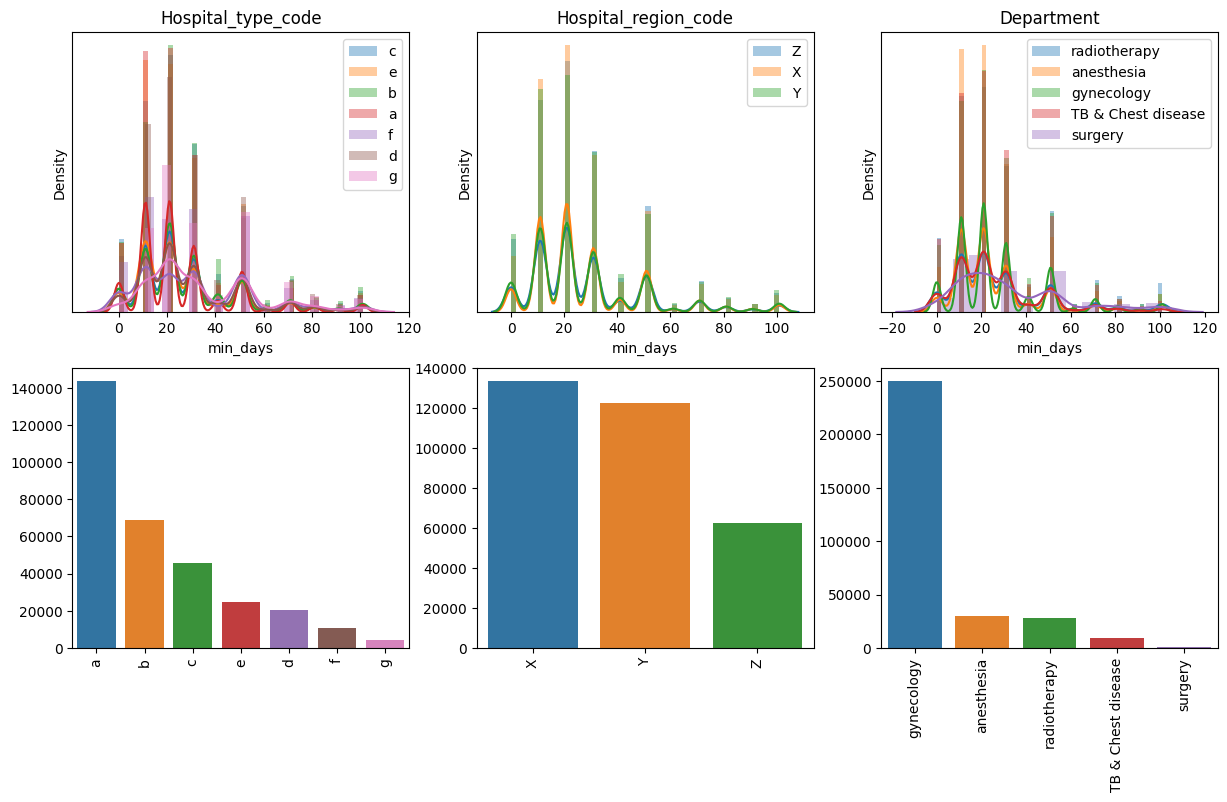

In [98]:

#GRAFICA DE DATOS

DT_in1 = DT_in[:]

DT_in1['min_days'] = DT_in2['min_days']

DT_in1.drop('Stay', axis = 'columns', inplace=True)



C_STR_names[0]
DT_in1


plt.figure(figsize=(20,8))
for i,c in enumerate(C_STR_names[:3]):    
    plt.subplot(2,4,i+1)
    k=DT_in1[[c,"min_days"]].dropna()
    for v in DT_in1[c].dropna().unique():
        sns.distplot(k.min_days[k[c]==v], label=v);
        plt.title(c)
    plt.yticks([])
    plt.legend()
    plt.subplot(2,4,i+5)
    vc = k[c].value_counts()
    #print(vc.values)
    df_g = pd.DataFrame(vc)

    np.transpose(df_g)
    sns.barplot(data = np.transpose(df_g)) 
    #sns.barplot(vc)    
    plt.xticks(range(len(vc)), vc.index, rotation="vertical")

<ipython-input-99-ad8ebac145e7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k.min_days[k[c]==v], label=v);
<ipython-input-99-ad8ebac145e7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k.min_days[k[c]==v], label=v);
<ipython-input-99-ad8ebac145e7>:6: UserWarning: 

`distplot` is a deprec

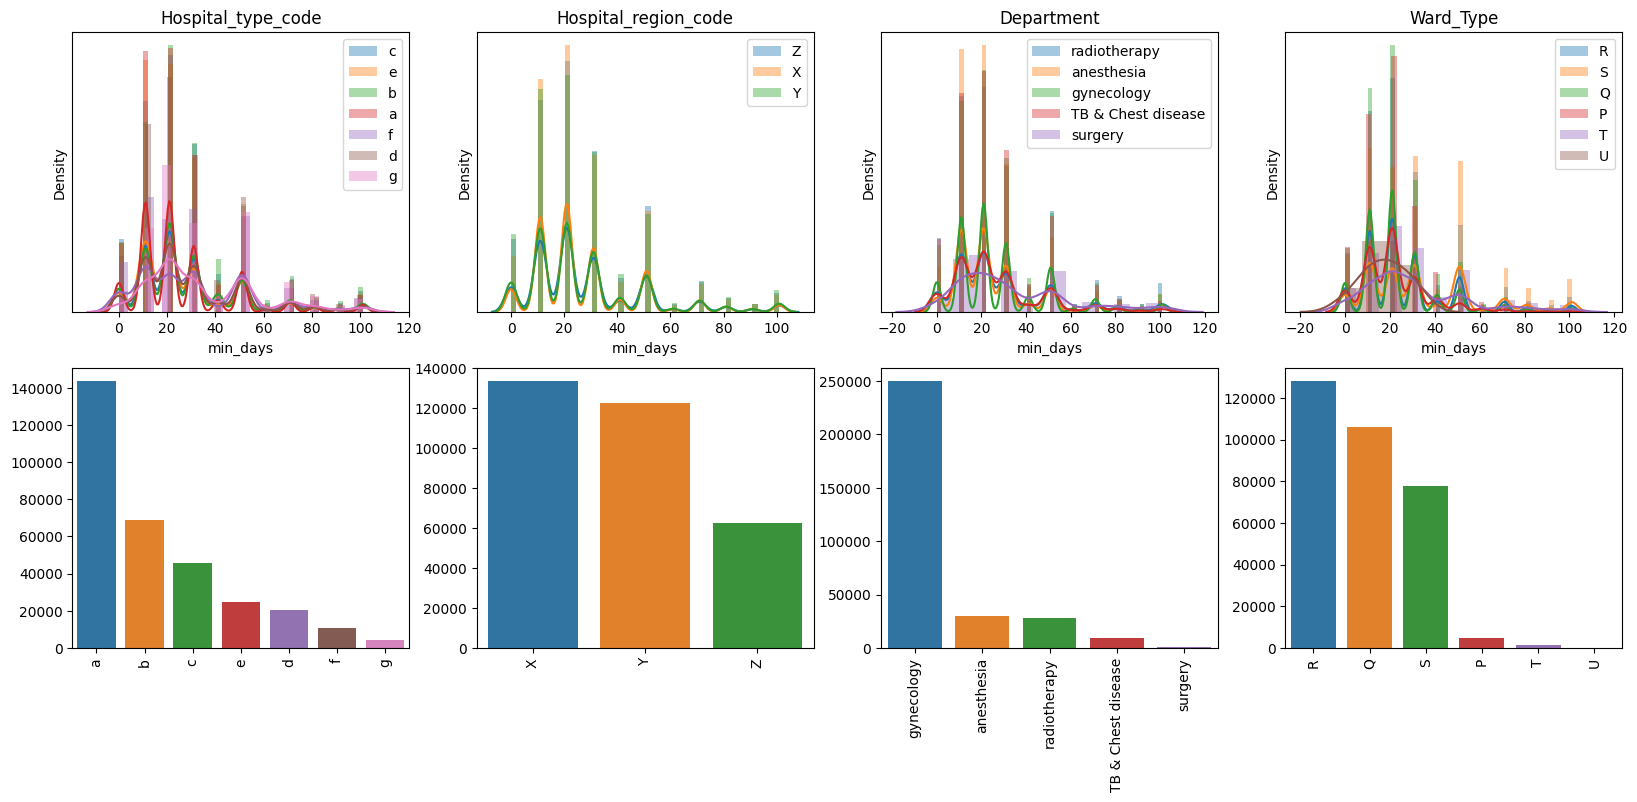

In [99]:

plt.figure(figsize=(20,8))
for i,c in enumerate(C_STR_names[:4]):    
    plt.subplot(2,4,i+1)
    k=DT_in1[[c,"min_days"]].dropna()
    for v in DT_in1[c].dropna().unique():
        sns.distplot(k.min_days[k[c]==v], label=v);
        plt.title(c)
    plt.yticks([])
    plt.legend()
    plt.subplot(2,4,i+5)
    vc = k[c].value_counts()
    #print(vc.values)
    df_g = pd.DataFrame(vc)

    np.transpose(df_g)
    sns.barplot(data = np.transpose(df_g)) 
    #sns.barplot(vc)    
    plt.xticks(range(len(vc)), vc.index, rotation="vertical")

<Axes: >

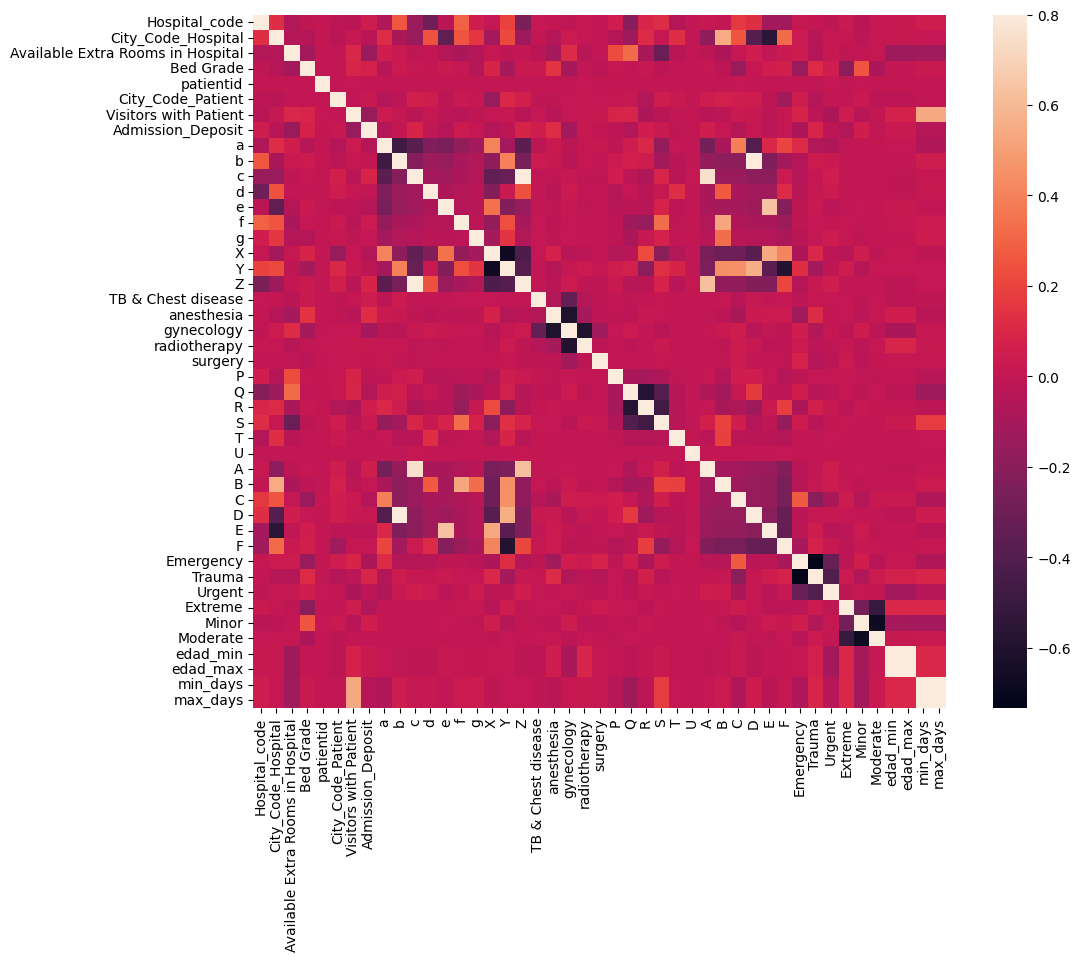

In [100]:
corrmat = DT_in2[DT_in2.columns[:]].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

#**PREPROCESADO**

In [101]:
data_org =pd.read_csv("train.csv",index_col=0)

DT_in2 = pd.read_csv("train.csv",index_col=0)

In [102]:
def random_fill_nan(col_name_nan, DTf_rep_nan):
    """col_name_nan es el nombre de la columna en donde se tienen valores 
    NaN
    
    DTf_rep_nan es el data frame que contiene la columna con nombre col_name_nan
    y en donde se van a reemplzar los valores por NaN por otro valor.
    
    Los datos NaN se reemplzan por un valor aleatorio contenido en los valores
    existentes en las columnas.
    
    La función retorna un El data set ingresado sin datos NaN
    """
    
    
    val_na_col = DTf_rep_nan[col_name_nan].isna()
    
    indices_nan= val_na_col.loc[val_na_col == True].index
    
    values_in_nan_cols = np.unique(DTf_rep_nan[col_name_nan])

    min_val_replace = min(values_in_nan_cols)
    
    max_val_replace = max(values_in_nan_cols)
    
    for indx_nan_r in indices_nan:
       
        new_nan1 = float(rnd.randint(min_val_replace,max_val_replace))
        
        DTf_rep_nan.loc[indx_nan_r , col_name_nan] = new_nan1
    
    return 'done'


In [103]:
def frecuencia_per_data(DATA, NAMES):
    
    """DATA = data set a modificar
    NAMES =  nombre de columna categorica
    
    devuelve un data set con solo números, pues se reemplazan las variables
    categoricas por su frecuencia de aparición"""

    col_a_contar = DATA[NAMES]
    
    val_con_ele = np.unique(col_a_contar)
    
    fre_per_name = np.array([np.sum(col_a_contar==val_in_col) for val_in_col in val_con_ele])
    
    
    index_per_val_in_col = np.array([np.where(col_a_contar==val_index) for val_index in val_con_ele ])
    
    
    for i in range(len(fre_per_name)):
        DATA[NAMES].iloc[index_per_val_in_col[i][0]] = fre_per_name[i]
    
    
    DATA_FRE = DATA[:]
    return DATA_FRE


In [104]:
def rangos_edades (rango_str, DTf_ages, col_name_org,new_col_max):
    """rango_str =  es un string con dos valores, un minimo y un maximo
    
    DTf_ages, es un data frame en donde se agregaran los valores minimos
    y maximos extraidos de rango_str a la columna correspondiente
    
    como resultado de la función se tendrá que en el data frame entregado 
    se escribirán los valores minimos y maximos en las columnas especificadas

    """
    
    guion = rango_str.index('-')
    
    min_rango = int(rango_str[0:guion])
    
    max_rango = int(rango_str[guion+1:])
    
    
    
    
    DTf_ages.loc[DTf_ages[col_name_org] == rango_str, new_col_max] = max_rango
    
    return min_rango, max_rango


In [105]:
def rel_mrae(estimator, X, y):
    """Función que define la metrica de medida de error, en 
    este caso es RMSLE"""
    preds = estimator.predict(X)
    return mean_squared_log_error(y,preds)

In [106]:
def rel_mrae2(estimator, X, y):
    """Función que define la metrica de medida de error, en 
    este caso es RMSLE"""
    preds = estimator.predict(X)
    return mean_squared_log_error(y,preds), preds

In [107]:
def rel_mrae_per_data(predicciones, y_exp):
    """Función que calcula el error cometido en cada dato"""
    errors= np.array([((((np.log(predicciones[err] +1)-np.log(y_exp[err] +1)))**2)*(1/len(y_exp)))**0.5 for err in range(len(y_exp))])

    return errors

In [108]:
def bootstrap_score(estimator, X, y, test_size):
  """Función PARA HACER bootstrapING"""
  trscores, tsscores = [], []
  for _ in range(3):
    Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=test_size)
    estimator.fit(Xtr, ytr)
    trscores.append(rel_mrae(estimator, Xtr, ytr))
    tsscores.append(rel_mrae(estimator, Xts, yts))

  return (np.mean(trscores), np.std(trscores)), (np.mean(tsscores), np.std(tsscores))


In [109]:
"""Lo primero que se hace es eliminar los datos
nan del data set, random_fill_nan en cada una de las columnas
que contenga datos nan"""
col_names_nan = []

for na_obj in DT_in2.columns:
    
    if np.sum(DT_in2[na_obj].isna()) !=0:
        col_names_nan.append(na_obj)

for c_nan_name in col_names_nan:
  random_fill_nan(c_nan_name,DT_in2)

In [110]:
"""Una vez el data set tenga datos no nan, se procede 
a unificar el tipo de datos, es decir se crea un data set con datos
numericos unicamente. Se aplica la función frecuencia_per_data en cada una de las
columnas que presenten variables categoricas"""

C_STR_names = []

for i in DT_in2.columns:
    if DT_in2[i].dtype == 'object':
     C_STR_names.append(i) 

for cc in C_STR_names[:len(C_STR_names)-1]:
    frecuencia_per_data(DT_in2,cc)

for age in np.unique(DT_in2['Stay']):
    try:
        rangos_edades(age,DT_in2,'Stay','Stay_max')
    except:
        continue

DT_in2.drop('Stay', axis = 'columns', inplace=True)

DT_in2['Stay_max'].iloc[np.where(DT_in2['Stay_max'].isna())] = 101

<ipython-input-103-182279463347>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  index_per_val_in_col = np.array([np.where(col_a_contar==val_index) for val_index in val_con_ele ])
<ipython-input-103-182279463347>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA[NAMES].iloc[index_per_val_in_col[i][0]] = fre_per_name[i]
<ipython-input-110-d73dc3163b0d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [111]:
"""En el vectro X se guardan los datos de las caracteristicas de cada
paciente, menos el case_id. En el vector y se gurda el valor de días
de estancia en el hospital (esta es a su vez la cantidad a predecir) (P)"""

X = DT_in2.values[:,1:-1]
y = DT_in2["Stay_max"].values

In [112]:
DT_in2

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay_max
case_id,,,,,,,,,,,,,,,,,
1,8,45928,3,62674,3,28516,127947,112753,2.0,31397,7.0,117676,56723,2,48514,4911.0,10.0
2,2,45928,5,62674,2,28516,77794,112753,2.0,31397,7.0,152261,56723,2,48514,5954.0,50.0
3,10,24770,1,133336,2,29649,77794,55351,2.0,31397,7.0,152261,56723,2,48514,4745.0,40.0
4,26,68946,2,122428,2,28516,127947,51809,2.0,31397,7.0,152261,56723,2,48514,7272.0,50.0
5,26,68946,2,122428,2,28516,77794,51809,2.0,31397,7.0,152261,56723,2,48514,5558.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318434,6,143425,6,133336,3,28516,106165,112753,4.0,86499,23.0,117676,175843,3,63749,4144.0,20.0
318435,24,143425,1,133336,2,29649,106165,55351,4.0,325,8.0,48501,175843,4,7890,6699.0,40.0
318436,7,143425,4,133336,3,249486,127947,112753,4.0,125235,10.0,117676,85872,3,35792,4235.0,20.0


#**GENERACIÓN DE MODELOS**

In [113]:
"""se crean varios modelos, cada uno con diferente grado de complejidad"""

estimator1 = LogisticRegression()
estimator2 = DecisionTreeClassifier(max_depth=10)
estimator3 = RandomForestClassifier(n_estimators=3, max_depth=9)

estimadores = [(estimator1,'estimator1'),(estimator2,'estimator2'),(estimator3,'estimator3')]

test_size_eval = np.array([(perc/10) for perc in range(1,10)])

In [114]:
test_size_eval

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [115]:
"""se generan los datos para las curvas de aprendijaze solo con una porción 
de los datos, a´si se puede simular el cambio de las curvas de aprendizaje al 
aumentar el numero de datos disponibles"""

percentage_data = int((np.shape(DT_in2)[0])/2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

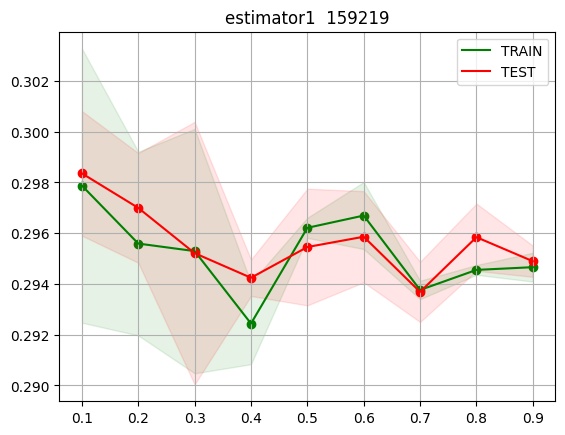

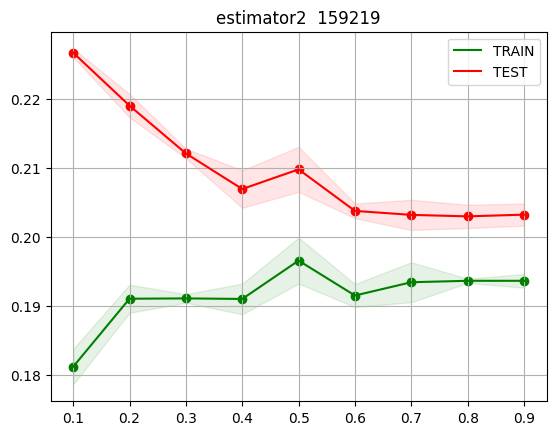

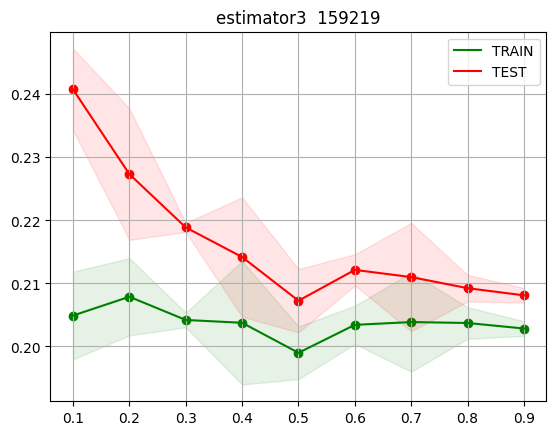

In [116]:
"""se genera una grafica que contiene la curva de aprejndizaje para test y 
para tarin, es posible variar los parametros de complejidad y numero 
de datos con el fin de tener casos de overfiting y sesgo y ver
como estos pueden o no ser corregidos"""

for est in estimadores:
    data_learning_curve_TEST = []
    data_learning_curve_std_TEST = []
    data_learning_curve_TRAIN = []
    data_learning_curve_std_TRAIN = []
    
    for learn_c in test_size_eval:
    
        R=bootstrap_score(est[0],X[:percentage_data],y[:percentage_data],learn_c)
       
        mean_test = R[1][0]
        std_test = R[1][1]
        
        data_learning_curve_TEST.append(mean_test)
        data_learning_curve_std_TEST.append(std_test)
        
        
        mean_train = R[0][0]
        std_train = R[0][1]
    
        
        data_learning_curve_TRAIN.append(mean_train)
        data_learning_curve_std_TRAIN.append(std_train)    
    
    des_TRAIN_up = np.array(data_learning_curve_TRAIN) + np.array(data_learning_curve_std_TRAIN)
    
    des_TRAIN_down = np.array(data_learning_curve_TRAIN) - np.array(data_learning_curve_std_TRAIN)    
    
    des_TEST_up = np.array(data_learning_curve_TEST) + np.array(data_learning_curve_std_TEST)
    
    des_TEST_DOWN = np.array(data_learning_curve_TEST) - np.array(data_learning_curve_std_TEST)
    
    plt.figure()
    
    plt.scatter(1-test_size_eval,data_learning_curve_TRAIN,color='green')
    
    plt.plot(1-test_size_eval,data_learning_curve_TRAIN,'green', label = 'TRAIN')
    
    plt.fill_between(1-test_size_eval, des_TRAIN_up, des_TRAIN_down, color='green',
                     alpha=0.1)    
    
    plt.scatter(1-test_size_eval,data_learning_curve_TEST,color='red')
    plt.plot(1-test_size_eval,data_learning_curve_TEST, color = 'red', label = 'TEST')
    plt.fill_between(1-test_size_eval, des_TEST_up, des_TEST_DOWN, color='red',
                     alpha=0.1)
        
    titulo= est[1]+'  '+str(percentage_data)
    plt.title(titulo)
    plt.legend()
    plt.grid()

In [117]:
def report_cv_score(z):
  """Funcion para visualizar el desempeño de los modelos"""

  print ("test score   %.3f (±%.4f) with %d splits"%(np.mean(z["test_score"]), np.std(z["test_score"]), len(z["test_score"])))
  print ("train score  %.3f (±%.4f) with %d splits"%(np.mean(z["train_score"]), np.std(z["train_score"]), len(z["train_score"])))

In [118]:
d = DT_in2.iloc[:percentage_data]
X = d.values[:,1:-1]
y = d["Stay_max"].values
print (X.shape, y.shape)

"""Se evalua el desempeño, en train y en test, de los modelos con base en el RMSLE medio """

z1 = cross_validate(estimator1, X, y, return_train_score=True, return_estimator=True,
                    scoring=rel_mrae, cv=ShuffleSplit(n_splits=3, test_size=0.1))

z2 = cross_validate(estimator2, X, y, return_train_score=True, return_estimator=True,
                    scoring=rel_mrae, cv=ShuffleSplit(n_splits=3, test_size=0.1))


z3 = cross_validate(estimator3, X, y, return_train_score=True, return_estimator=True,
                    scoring=rel_mrae, cv=ShuffleSplit(n_splits=3, test_size=0.1))

print(report_cv_score(z1),'\n')
print(report_cv_score(z2),'\n')
print(report_cv_score(z3),'\n')


(159219, 15) (159219,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

test score   0.295 (±0.0020) with 3 splits
train score  0.294 (±0.0012) with 3 splits
None 

test score   0.205 (±0.0023) with 3 splits
train score  0.194 (±0.0022) with 3 splits
None 

test score   0.207 (±0.0075) with 3 splits
train score  0.201 (±0.0071) with 3 splits
None 



In [119]:
"""Se define un tamaño de la muestra con base en el porcentaje de 
datos tomado del total de datos disponible  (A)"""  
sample_dat = int(percentage_data/1)

d = DT_in2.iloc[:percentage_data].sample(sample_dat)
X = d.values[:,1:-1]
y = d["Stay_max"].values

In [120]:
"""Se elige un porcentaje de datos de Test, se asegura que el número 
de datos que se usa en el Test para reportar el desempeño, sea el mismo
que se emplea para elegir el modelo """

test_size = 0.3 
val_size  = test_size/(1-test_size) # so that the have the same number of elements

print ("test size %.2f"%test_size)
print ("val size is %.2f (relative to %.2f) "%(val_size, 1-test_size))

Xtv, Xts, ytv, yts = train_test_split(X, y, test_size=test_size)
print (Xtv.shape, Xts.shape, round(len(Xtv)*val_size))

test size 0.30
val size is 0.43 (relative to 0.70) 
(111453, 15) (47766, 15) 47766


In [121]:
"""Se crea una lista para guardar los desempeños de los modelos
que se prueban con los datos de validación. Se evaluan los
modelos con los tres estimadores definidos anteriormente"""
zscores = []
estimators = [estimator1, estimator2, estimator3]

In [122]:
"""ahí se esta evaluando solo con la parte de validación, no se 
han usado los datos de test, es decir, el modelo solo se ha entrenado
con datos ya vistos. Es necesario ponerlo a prueba con datos
realmente nuevos"""

for estimator in estimators:
    print("--")
    z = cross_validate(estimator, Xtv, ytv, return_train_score=True, return_estimator=False,
                       scoring=rel_mrae, cv=ShuffleSplit(n_splits=10, test_size=val_size))
    report_cv_score(z)
    zscores.append(np.mean(z["test_score"]))
best = np.argmin(zscores)
#print ("selecting ", best)
best_estimator = estimators[best]
print ("\nModelo elegido")
print (best_estimator)

--


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

test score   0.293 (±0.0021) with 10 splits
train score  0.293 (±0.0016) with 10 splits
--
test score   0.208 (±0.0022) with 10 splits
train score  0.192 (±0.0017) with 10 splits
--
test score   0.214 (±0.0072) with 10 splits
train score  0.204 (±0.0077) with 10 splits

Modelo elegido
DecisionTreeClassifier(max_depth=10)


In [123]:
"""Aqui se pone a prueba el modelo con mejor desempeño 
en la parte de validación y se pone a prueba con los datos 
de test"""

best_estimator.fit(Xtv,ytv)
reported_performance = rel_mrae(best_estimator, Xts, yts)
print ("Desempeño del modelo en etapa de validación %.3f"%reported_performance)

Desempeño del modelo en etapa de validación 0.206


In [124]:
"""Aqui se pone a prueba el modelo con mejor desempeño 
en la parte de validación y se pone a prueba con los datos 
de test"""

best_estimator.fit(Xtv,ytv)
reported_performance = rel_mrae2(best_estimator, Xts, yts)[0]
print ("Desempeño real del modelo %.3f"%reported_performance)


predic_best_est = rel_mrae2(best_estimator, Xts, yts)[1]

Desempeño real del modelo 0.206


Text(0.5, 1.0, 'Confusion Matrix')

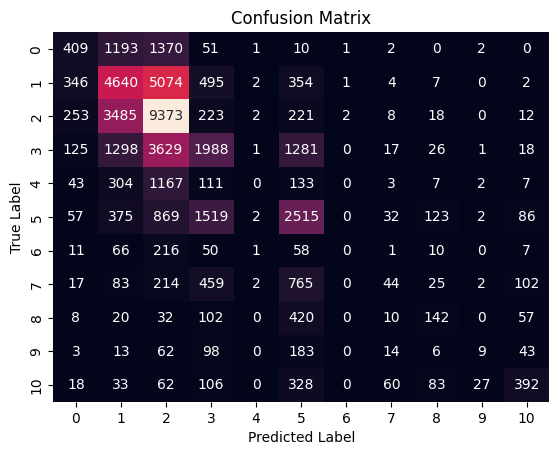

In [125]:
"""Es interesante esta grafica, pero muestra que el modelo comete
muchos errores"""

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(yts, predic_best_est)
sns.heatmap(cm,annot=True,cbar=False, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [126]:
DT_in2

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay_max
case_id,,,,,,,,,,,,,,,,,
1,8,45928,3,62674,3,28516,127947,112753,2.0,31397,7.0,117676,56723,2,48514,4911.0,10.0
2,2,45928,5,62674,2,28516,77794,112753,2.0,31397,7.0,152261,56723,2,48514,5954.0,50.0
3,10,24770,1,133336,2,29649,77794,55351,2.0,31397,7.0,152261,56723,2,48514,4745.0,40.0
4,26,68946,2,122428,2,28516,127947,51809,2.0,31397,7.0,152261,56723,2,48514,7272.0,50.0
5,26,68946,2,122428,2,28516,77794,51809,2.0,31397,7.0,152261,56723,2,48514,5558.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318434,6,143425,6,133336,3,28516,106165,112753,4.0,86499,23.0,117676,175843,3,63749,4144.0,20.0
318435,24,143425,1,133336,2,29649,106165,55351,4.0,325,8.0,48501,175843,4,7890,6699.0,40.0
318436,7,143425,4,133336,3,249486,127947,112753,4.0,125235,10.0,117676,85872,3,35792,4235.0,20.0


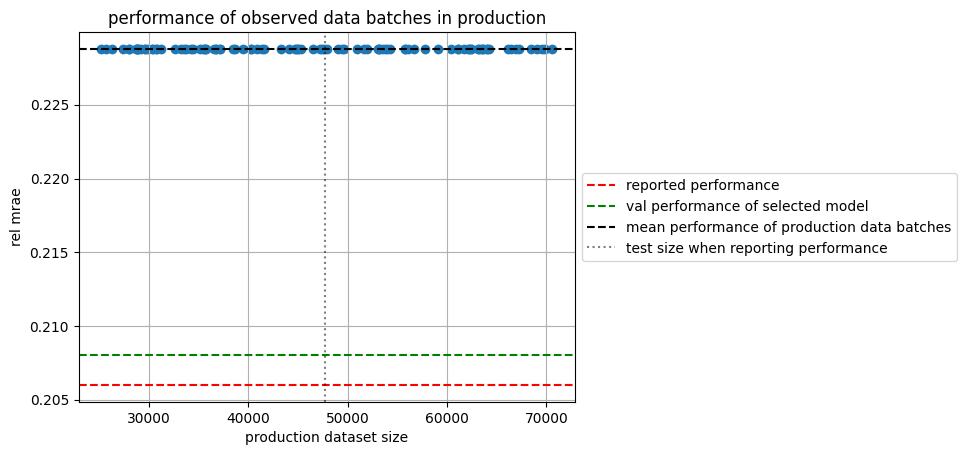

In [127]:
er = []
sizes = []
for _ in range(100):
    size = len(Xts)+np.random.randint(len(Xts))-len(Xts)//2
    ed = DT_in2.iloc[percentage_data:].sample(sample_dat)
    eX = ed.values[:,1:-1]
    ey = ed["Stay_max"].values
    er.append(rel_mrae(best_estimator, eX, ey))
    sizes.append(size)

plt.scatter(sizes, er)
plt.xlabel("production dataset size")
plt.ylabel("rel mrae")
plt.title("performance of observed data batches in production")
plt.axhline(reported_performance, color="red", ls="--", label="reported performance")
plt.axhline(zscores[best], color="green", ls="--", label="val performance of selected model")
plt.axhline(np.mean(er), color="black", ls="--", label="mean performance of production data batches")
plt.axvline(len(Xts), color="black", alpha=.5, ls=":", label="test size when reporting performance")
plt.grid(); plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));